# Introduction

* The **goal** of this Artificial Neural Network (ANN) 101 session is twofold:
  * To build an ANN model that will be able to predict y value according to x value. 
    * In other words, we want our ANN model  to perform a regression analysis.
  * To observe three important KPI when dealing with ANN: 
    * The size of the network (called *trainable_params* in our code)
    * The duration of the training step (called *training_ duration:* in our code)
    * The efficiency of the ANN model (called *evaluated_loss* in our code)
  
* The data used here are exceptionally simple:
  * X represents the interesting feature (i.e. will serve as input X for our ANN).
    * Here, each x sample is a one-dimension single scalar value.
  * Y represents the target (i.e. will serve as the exected output Y of our ANN).
    * Here, each x sample is also a one-dimension single scalar value.


* Note that in real life:
  * You will never have such godsent clean, un-noisy and simple data. 
  * You will have more samples, i.e. bigger data (better for statiscally meaningful results).
  * You may have more dimensions in your feature and/or target (e.g. space data, temporal data...).
  * You may also have more multiple features and even multiple targets.
  * Hence your ANN model will be more complex that the one studied here

# Work to be done:
For exercices A to E, the only lines of code that need to be added or modified are in the  **create_model()** Python function.

## Exercice A
* Run the whole code, Jupyter cell by Jupyter cell, without modifiying any line of code.
* Write down the values for:
  * *trainable_params:* 
  * *training_ duration:* 
  * *evaluated_loss:* 
* In the last Jupyter cell, what is the relationship between the predicted x samples and y samples? Try to explain it base on the ANN model? 

## Exercice B
* Add a first hidden layer called "hidden_layer_1" containing 8 units in the model of the ANN. 
* Restart and execute everything again. 
* Write down the obtained values for:
  * *trainable_params:* 
  * *training_ duration:* 
  * *evaluated_loss:* 
* How better is it with regard to Exercice A?
  * Worse? Not better? Better? Strongly better?
  
## Exercice C
* Modify the hidden layer called "hidden_layer_1" so that it  contains 128 units instead of 8.
* Restart and execute everything again.
* Write down the obtained values for:
  * *trainable_params:* 
  * *training_ duration:*
  * *evaluated_loss:* 
* How better is it with regard to Exercice B?
  * Worse? Not better? Better? Strongly better?
  
## Exercice D
* Add a second hidden layer called "hidden_layer_2" containing 32 units in the model of the ANN. 
* Write down the obtained values for:
  * *trainable_params:* 
  * *training_ duration:* 
  * *evaluated_loss:* 
* How better is it with regard to Exercice C?
  * Worse? Not better? Better? Strongly better?
  
## Exercice E
* Add a third hidden layer called "hidden_layer_3" containing 4 units in the model of the ANN. 
* Restart and execute everything again.
* Look at the graph in the last Jupyter cell. Is it better?
* Write down the obtained values for:
  * *trainable_params:* 
  * *training_ duration:* 
  * *evaluated_loss:* 
* How better is it with regard to Exercice D?
  * Worse? Not better? Better? Strongly better?
  
## Exercice F
* If you still have time, you can also play with the training epochs parameter, the number of training samples (or just exchange the training datasets with the test datasets), the type of runtime hardware (GPU orTPU), and so on...


# Python Code

## Import the tools

In [0]:
# To enable Tensorflow 2 instead of TensorFlow 1.15, uncomment the next 4 lines

#try:
#  %tensorflow_version 2.x 
#except Exception: 
#  pass

In [0]:
# library to store and manipulate neural-network input and output data
import numpy as np

# library to graphically display any data
import matplotlib.pyplot as plt

# library to manipulate neural-network models
import tensorflow as tf
from tensorflow import keras

In [0]:
# the code is compatible with Tensflow v1.15 and v2, but interesting info anyway
print("Tensorlow version:", tf.__version__)

# Versions needs to be 1.15.1 or greater (e.g. this code won't work with 1.13.1)

Tensorlow version: 1.15.0


In [0]:
# To check whether you code will use a GPU or not, uncomment the following two
# lines of code. You should either see:
# * an "XLA_GPU", 
# * or better a "K80" GPU
# * or even better a "T100" GPU

#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [0]:
import time

# trivial "debug" function to display the duration between time_1 and time_2
def get_duration(time_1, time_2):
  duration_time = time_2 - time_1
  m, s = divmod(duration_time, 60)
  h, m = divmod(m, 60)
  s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
  duration = "duration: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s)
  return duration

## Get the data

In [0]:
# DO NOT MODIFY THIS CODE
# IT HAS JUST BEEN WRITTEN TO GENERATE THE DATA

# library fr generating random number
#import random

# secret relationship between X data and Y data
#def generate_random_output_data_correlated_from_input_data(nb_samples):
# generate nb_samples random x between 0 and 1
#  X = np.array( [random.random() for i in range(nb_samples)] )
# generate nb_samples y correlated with x
#  Y = np.tan(np.sin(X) + np.cos(X))
#  return X, Y

#def get_new_X_Y(nb_samples, debug=False):
#  X, Y = generate_random_output_data_correlated_from_input_data(nb_samples)
#  if debug:
#    print("generate %d X and Y samples:" % nb_samples)
#    X_Y = zip(X, Y)
#    for i, x_y in enumerate(X_Y):
#      print("data sample %d: x=%.3f, y=%.3f" % (i, x_y[0], x_y[1]))
#  return X, Y

# Number of samples for the training dataset and the test dateset
#nb_samples=50
# Get some data for training the futture neural-network model
#X_train, Y_train = get_new_X_Y(nb_samples)
# Get some other data for evaluating the futture neural-network model
#X_test, Y_test = get_new_X_Y(nb_samples)
# In most cases, it will be necessary to normalize X and Y data with code like:
# X_centered -= X.mean(axis=0)
# X_normalized /= X_centered.std(axis=0)

#def mstr(X):
#  my_str ='['
#  for x in X:
#    my_str += str(float(int(x*1000)/1000)) + ','
#  my_str += ']'
#  return my_str
## Call get_data to have an idead of what is returned by call data

#generate_data = False
#if generate_data:
#  nb_samples = 50
#  X_train, Y_train = get_new_X_Y(nb_samples)
#  print('X_train = np.array(%s)' % mstr(X_train))
#  print('Y_train = np.array(%s)' % mstr(Y_train)) 
#  X_test, Y_test = get_new_X_Y(nb_samples)
#  print('X_test = np.array(%s)' % mstr(X_test))
#  print('Y_test = np.array(%s)' % mstr(Y_test))

In [0]:
X_train = np.array([0.765,0.838,0.329,0.277,0.45,0.833,0.44,0.634,0.351,0.784,0.589,0.816,0.352,0.591,0.04,0.38,0.816,0.732,0.32,0.597,0.908,0.146,0.691,0.75,0.568,0.866,0.705,0.027,0.607,0.793,0.864,0.057,0.877,0.164,0.729,0.291,0.324,0.745,0.158,0.098,0.113,0.794,0.452,0.765,0.983,0.001,0.474,0.773,0.155,0.875,])
Y_train = np.array([6.322,6.254,3.224,2.87,4.177,6.267,4.088,5.737,3.379,6.334,5.381,6.306,3.389,5.4,1.704,3.602,6.306,6.254,3.157,5.446,5.918,2.147,6.088,6.298,5.204,6.147,6.153,1.653,5.527,6.332,6.156,1.766,6.098,2.236,6.244,2.96,3.183,6.287,2.205,1.934,1.996,6.331,4.188,6.322,5.368,1.561,4.383,6.33,2.192,6.108,])
X_test = np.array([0.329,0.528,0.323,0.952,0.868,0.931,0.69,0.112,0.574,0.421,0.972,0.715,0.7,0.58,0.69,0.163,0.093,0.695,0.493,0.243,0.928,0.409,0.619,0.011,0.218,0.647,0.499,0.354,0.064,0.571,0.836,0.068,0.451,0.074,0.158,0.571,0.754,0.259,0.035,0.595,0.245,0.929,0.546,0.901,0.822,0.797,0.089,0.924,0.903,0.334,])
Y_test = np.array([3.221,4.858,3.176,5.617,6.141,5.769,6.081,1.995,5.259,3.932,5.458,6.193,6.129,5.305,6.081,2.228,1.912,6.106,4.547,2.665,5.791,3.829,5.619,1.598,2.518,5.826,4.603,3.405,1.794,5.23,6.26,1.81,4.18,1.832,2.208,5.234,6.306,2.759,1.684,5.432,2.673,5.781,5.019,5.965,6.295,6.329,1.894,5.816,5.951,3.258,])


In [0]:
print('X_train contains %d samples' % X_train.shape)
print('Y_train contains %d samples' % Y_train.shape)
print('')
print('X_test contains %d samples' % X_test.shape)
print('Y_test contains %d samples' % Y_test.shape)

X_train contains 50 samples
Y_train contains 50 samples

X_test contains 50 samples
Y_test contains 50 samples


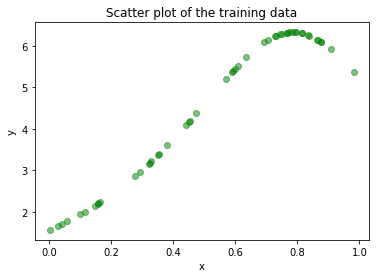

In [0]:
# Graphically display our training data
plt.scatter(X_train, Y_train, color='green', alpha=0.5)
plt.title('Scatter plot of the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

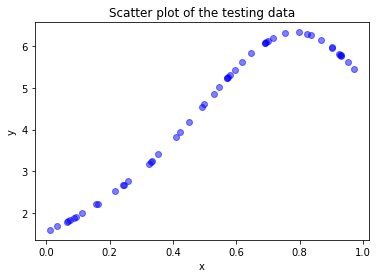

In [0]:
# Graphically display our test data
plt.scatter(X_test, Y_test, color='blue', alpha=0.5)
plt.title('Scatter plot of the testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Build the artificial neural-network

In [0]:
# THIS IS THE ONLY CELL WHERE YOU HAVE TO ADD AND/OR MODIFY CODE 

In [0]:
def create_model():
  
  # This returns a tensor
  model = keras.Sequential([
    keras.layers.Input(shape=(1,), name='input_layer'),
    keras.layers.Dense(128, activation=tf.nn.relu, name='hidden_layer_1'),    
    keras.layers.Dense(32, activation=tf.nn.relu, name='hidden_layer_2'),    
    keras.layers.Dense(4, activation=tf.nn.relu, name='hidden_layer_3'),    
    keras.layers.Dense(1, name='output_layer')
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01), 
                loss='mean_squared_error',
                metrics=['mean_absolute_error', 'mean_squared_error'])

  return model

In [0]:
  # Same model but for Keras 1.13.1
  #inputs_data = keras.layers.Input(shape=(1, ), name='input_layer')
  #hl_1_out_data = keras.layers.Dense(units=128, activation=tf.nn.relu, name='hidden_layer_1')(inputs_data)
  #hl_2_out_data = keras.layers.Dense(units=32, activation=tf.nn.relu, name='hidden_layer_2')(hl_1_out_data)
  #hl_3_out_data = keras.layers.Dense(units=4, activation=tf.nn.relu, name='hidden_layer_3')(hl_2_out_data)
  #outputs_data = keras.layers.Dense(units=1)(hl_3_out_data)
  #model = keras.models.Model(inputs=inputs_data, outputs=outputs_data)  


In [0]:
ann_model = create_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Display a textual summary of the newly created model
# Pay attention to size (a.k.a. total parameters) of the network
ann_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 128)               256       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 32)                4128      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 4)                 132       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 4,521
Trainable params: 4,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('trainable_params:', ann_model.count_params())

trainable_params: 4521


In [0]:
%%html
As a reminder for understanding, the following ANN unit contains <b>m + 1</b> trainable parameters:<br>
<img src='https://www.degruyter.com/view/j/nanoph.2017.6.issue-3/nanoph-2016-0139/graphic/j_nanoph-2016-0139_fig_002.jpg' alt="perceptron" width="400" />

## Train the artificial neural-network model

In [0]:
# Train the model with the input data and the output_values

# validation_split=0.2 means that 20% of the X_train samples will be used
# for a validation test and that "only" 80% will be used for training

t0 = time.time()
results = ann_model.fit(X_train, Y_train, verbose=False,
                        batch_size=1, epochs=500, validation_split=0.2)
t1 = time.time()
print('training_%s' % get_duration(t0, t1))

training_duration: 00:00:28


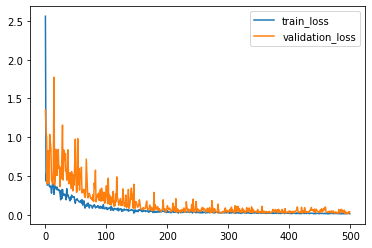

In [0]:
#plt.plot(r.history['mean_squared_error'], label = 'mean_squared_error')
plt.plot(results.history['loss'], label = 'train_loss')
plt.plot(results.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

In [0]:

# If you can write a file locally (i.e. If Google Drive available on Colab environnement)
# then, you can save your model in a file for future reuse.
# (c.f. https://www.tensorflow.org/guide/keras/save_and_serialize)

# Only uncomment the following file if you can write a file
# model.save('ann_101.h5')


## Evaluate the model

In [0]:
loss, mean_absolute_error, mean_squared_error = ann_model.evaluate(X_test, Y_test, verbose=True)

50/50 [==============================] - 0s 105us/sample - loss: 0.0240 - mean_absolute_error: 0.1283 - mean_squared_error: 0.0240


## Predict new output data

In [0]:
X_new_values = [0., 0.2, 0.4, 0.6, 0.8, 1.0]
Y_predicted_values = ann_model.predict(X_new_values)

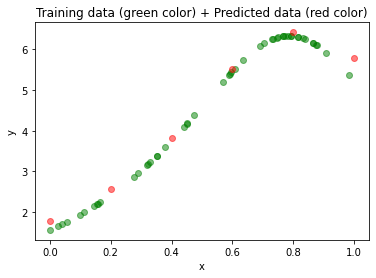

In [0]:
# Display training data and predicted data graphically
plt.title('Training data (green color) + Predicted data (red color)')

# training data in green color
plt.scatter(X_train, Y_train, color='green',  alpha=0.5)

# training data in green color
#plt.scatter(X_test, Y_test, color='blue',  alpha=0.5)

# predicted data in blue color
plt.scatter(X_new_values, Y_predicted_values, color='red',  alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()